## Data Understanding
Sumber Data

Dataset berasal dari Iris dataset (Fisher, 1936), salah satu dataset klasik dalam statistik dan machine learning.

### Struktur Data
Dataset berisi 150 baris (record) dengan 5 kolom (atribut):

Kolom Tipe Data Deskripsi
- sepal_length **numerik** Panjang sepal (dalam cm)
- sepal_width **numerik** Lebar sepal (dalam cm)
- petal_length **numerik** Panjang petal (dalam cm)
- petal_width **numerik** Lebar petal (dalam cm)
- species **kategorikal** Jenis bunga iris (setosa, versicolor, virginica)
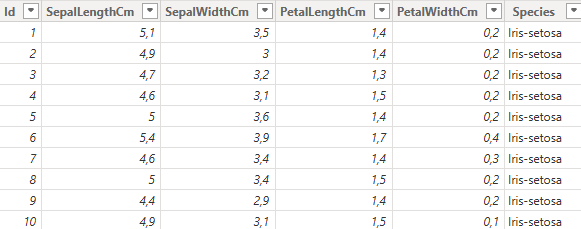

Karakteristik Data
Jumlah data: 150 observasi.

### 2. Membuat database iris di MySQL dan PosgreSQL dan ditarik pakai power BI
- mysql

        CREATE DATABASE belajar;
        USE belajar;

        CREATE TABLE iris (
            id INT,
            sepal_length_cm DECIMAL(4,2),
            sepal_width_cm DECIMAL(4,2),
            petal_length_cm DECIMAL(4,2),
            petal_width_cm DECIMAL(4,2),
            species VARCHAR(50)
        );


- postgres
        
        CREATE DATABASE psd;
        USE psd;

        CREATE TABLE iris (
            id INT,
            sepal_length_cm DECIMAL(4,2),
            sepal_width_cm DECIMAL(4,2),
            petal_length_cm DECIMAL(4,2),
            petal_width_cm DECIMAL(4,2),
            species VARCHAR(50)
        );
        

setelah membuat database memasukan dataset dengan import file dataset iris.csv dengan delimiter ; atau , setelah dimasukan datanya maka data sudah siap ditarik kedalam POWER BI

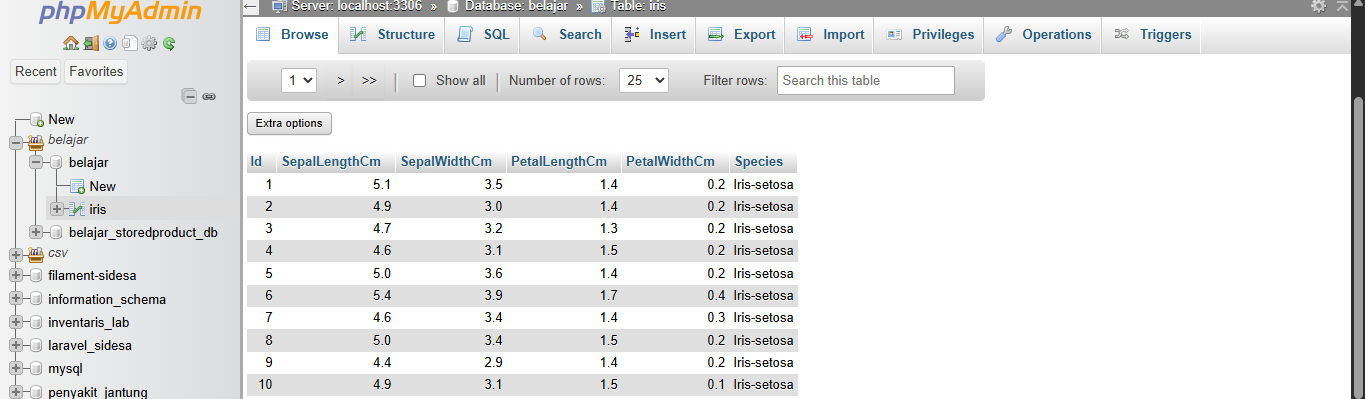

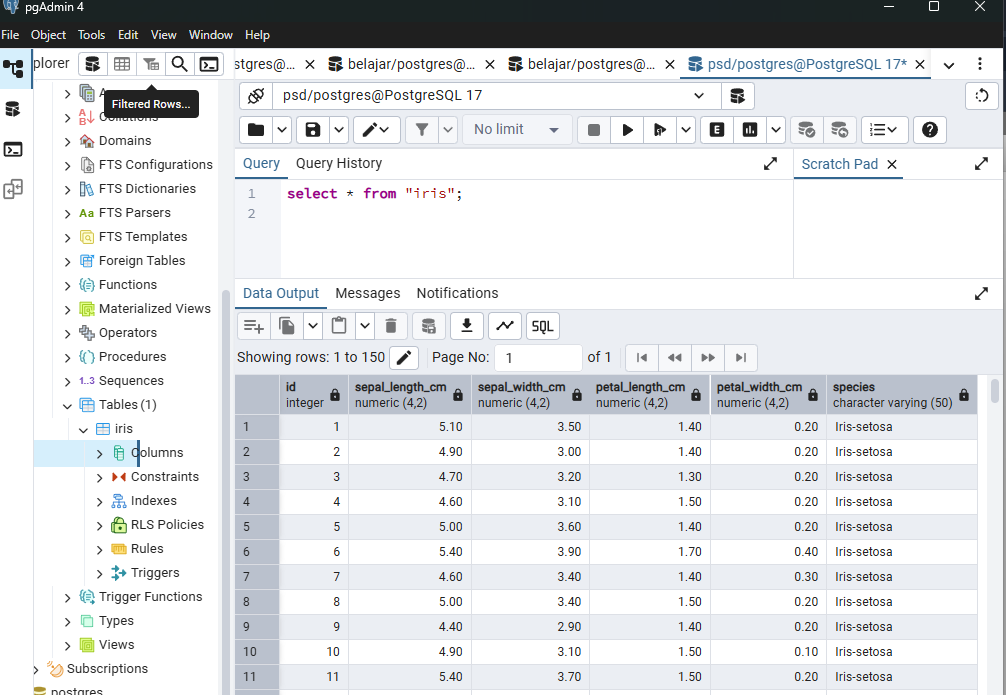


### Mengambil/Menarik Data dari MYSQL dan POSTGRES ke POWER BI

1. Masuk ke dashboard power bi seperti di gambar
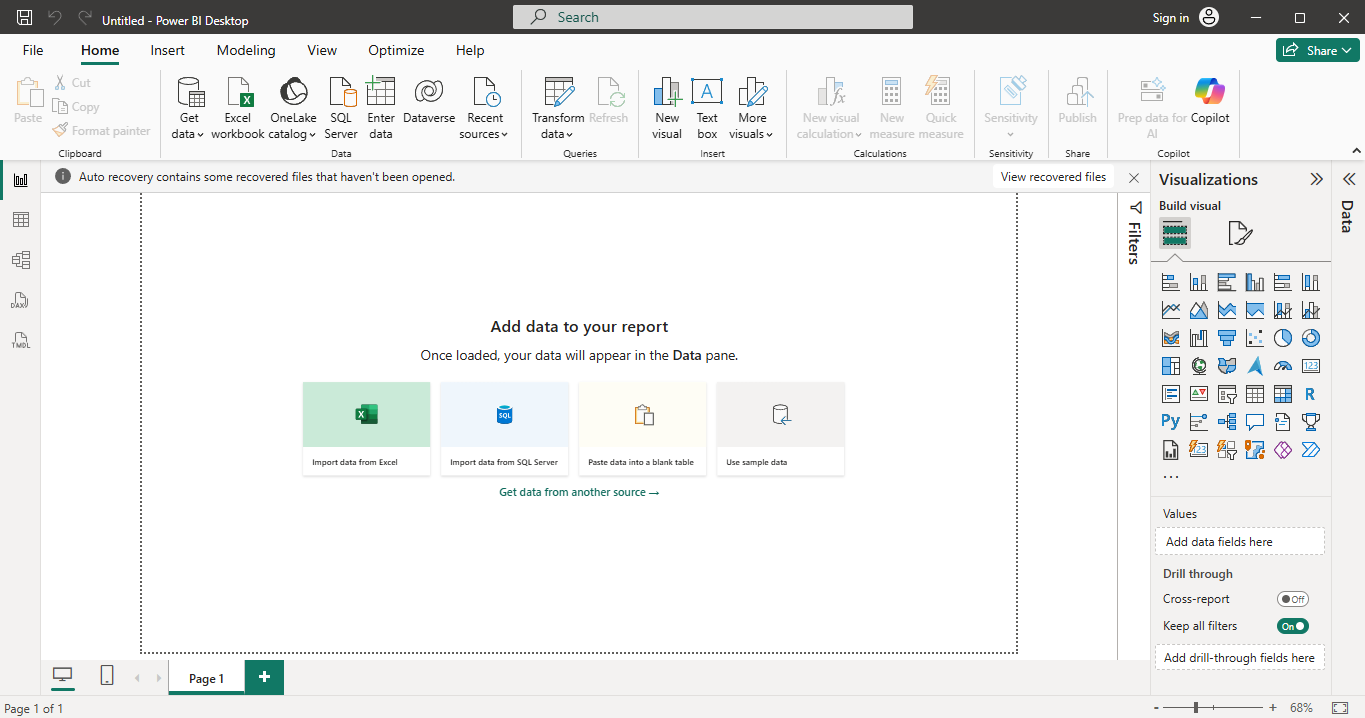

 "lalu mengambil data dari get data from anothe source" lalu pilih mysql dan postgres lalu conect

 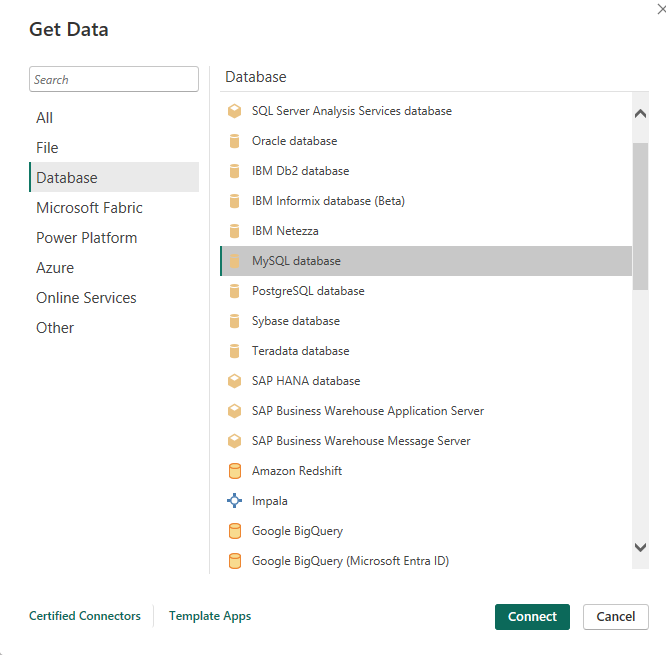

 masukan serve dan nama database saya mengunakan:
 - mysql:
    - server: 127.0.0.1:3306
    - database: belajar
    - username: root
    - password:
- postgres
    - server: 127.0.0.1:5432
    - database: psd
    - username: postgres
    - password: jawatimur
next saja jika sudah lalu akan masuk ke popup selanjutnya dan masukan username database dan passwordnya lalu masuk

setelah terconect maka pilih table yang ingin dipakai lalu load
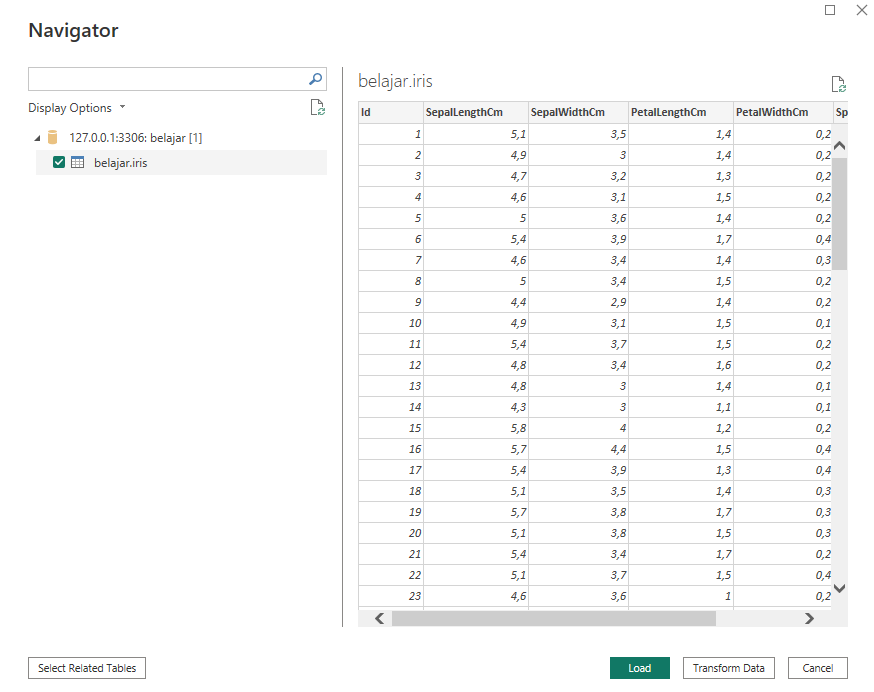

jika sudah diload dan berhasil maka akan muncul data nya ada di kanan dashboard seperti di gambar dan siap digunakan untuk keperluan yang dibutuhkan

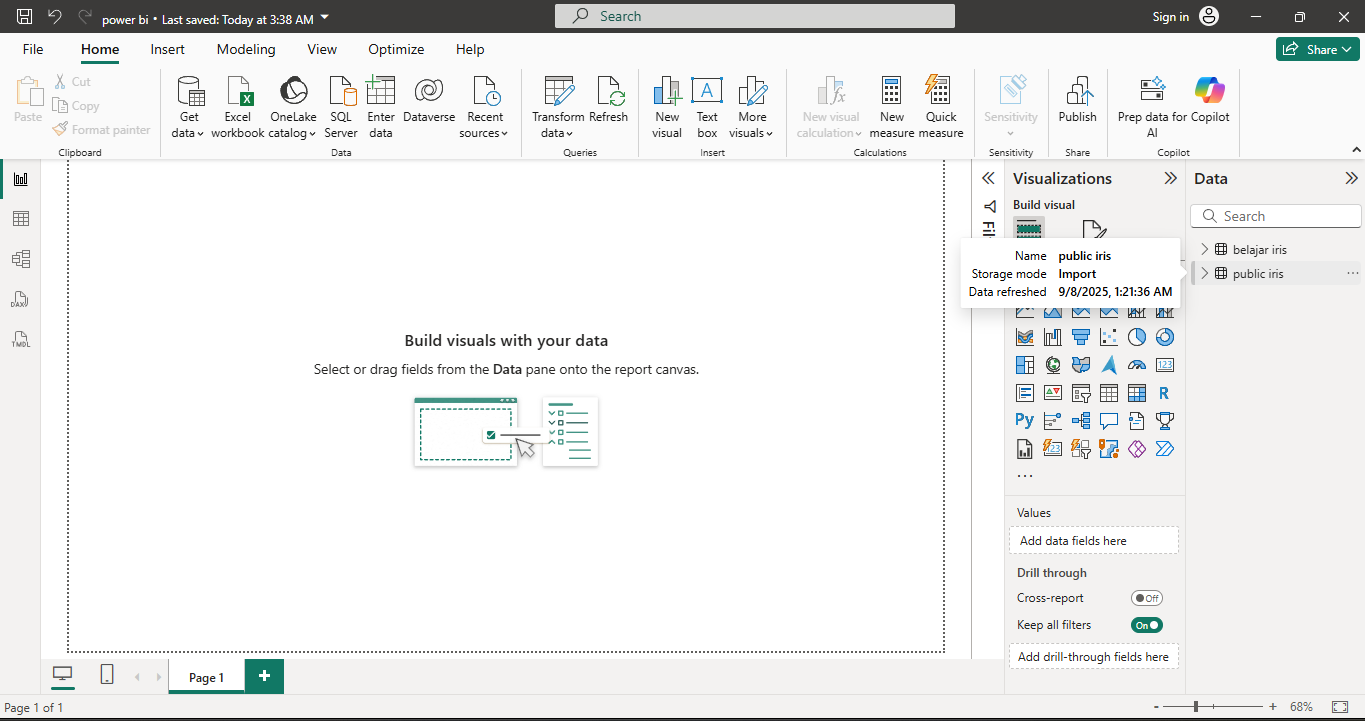

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/Iris.csv", sep=";")

# tampilkan info dataset
print(df.head())
print("\nInfo Dataset:")
print(df.info())

# ringkasan tipe data
data_types = pd.DataFrame({
    "Kolom": df.columns,
    "Tipe Data": [str(dtype) for dtype in df.dtypes],
    "Deskripsi": [
        "ID unik" if col == "Id" else
        "Panjang sepal (cm)" if col == "SepalLengthCm" else
        "Lebar sepal (cm)" if col == "SepalWidthCm" else
        "Panjang petal (cm)" if col == "PetalLengthCm" else
        "Lebar petal (cm)" if col == "PetalWidthCm" else
        "Jenis bunga iris (Setosa, Versicolor, Virginica)"
        for col in df.columns
    ]
})
print("\nRingkasan Tipe Data:\n", data_types)


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [ ]:
# Missing value
print("\nJumlah Missing Value per Kolom:")
print(df.isnull().sum())

# Cek duplikat
duplicates = df.duplicated().sum()
print(f"\nJumlah duplikat: {duplicates}")



Jumlah Missing Value per Kolom:
Id;SepalLengthCm;SepalWidthCm;PetalLengthCm;PetalWidthCm;Species    0
dtype: int64

Jumlah duplikat: 0


In [ ]:
# Statistik deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())



Statistik Deskriptif:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000



Jumlah data per Species:
 Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


/tmp/ipython-input-3345670428.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Species", palette="Set2")


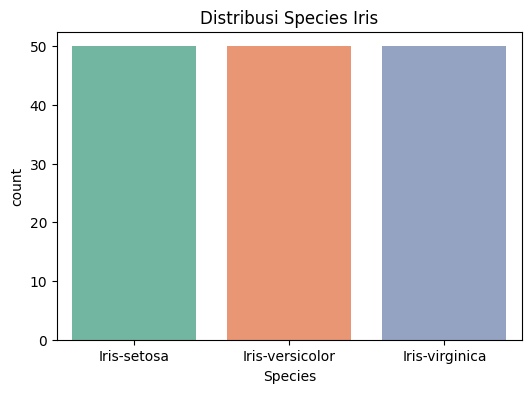

In [ ]:
# ==== 3. Distribusi Species ====

print("\nJumlah data per Species:\n", df['Species'].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Species", palette="Set2")
plt.title("Distribusi Species Iris")
plt.show()

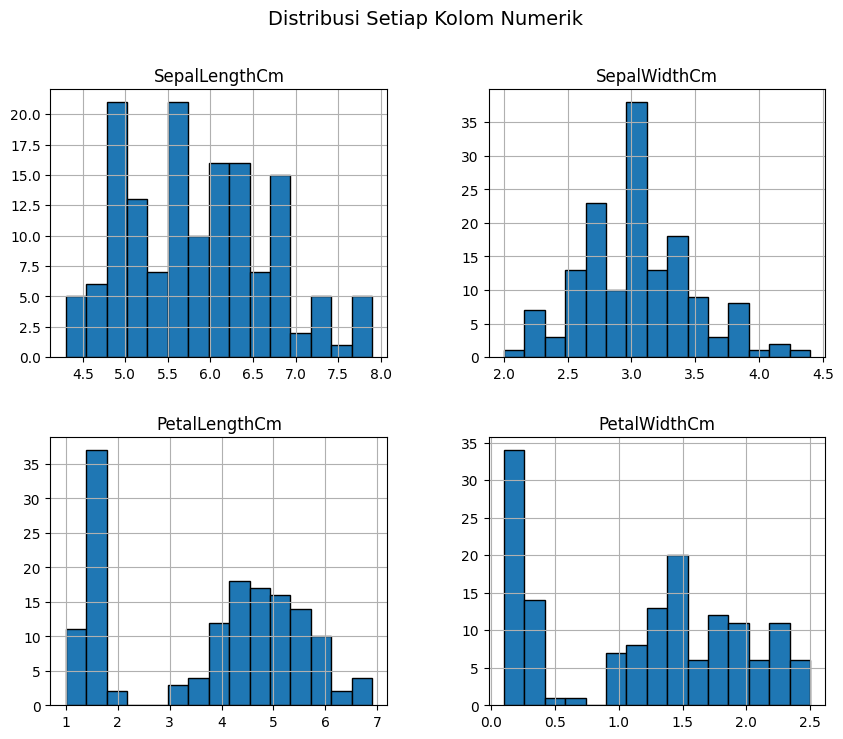

In [ ]:
# ==== 4. Histogram Kolom Numerik ====

df.drop(columns=["Id"]).hist(figsize=(10,8), bins=15, edgecolor="black")
plt.suptitle("Distribusi Setiap Kolom Numerik", fontsize=14)
plt.show()

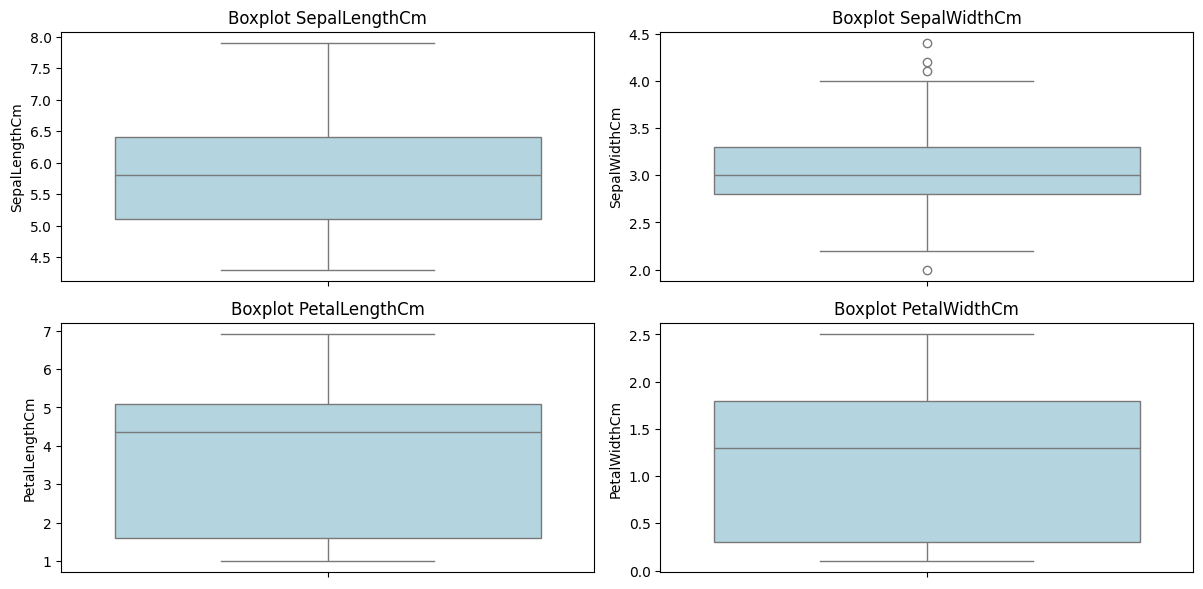

In [ ]:
# ==== 5. Boxplot untuk deteksi Outlier ====
plt.figure(figsize=(12,6))
for i, col in enumerate(["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"], 1):
    plt.subplot(2,2,i)
    sns.boxplot(y=df[col], color="lightblue")
    plt.title(f"Boxplot {col}")
plt.tight_layout()
plt.show()

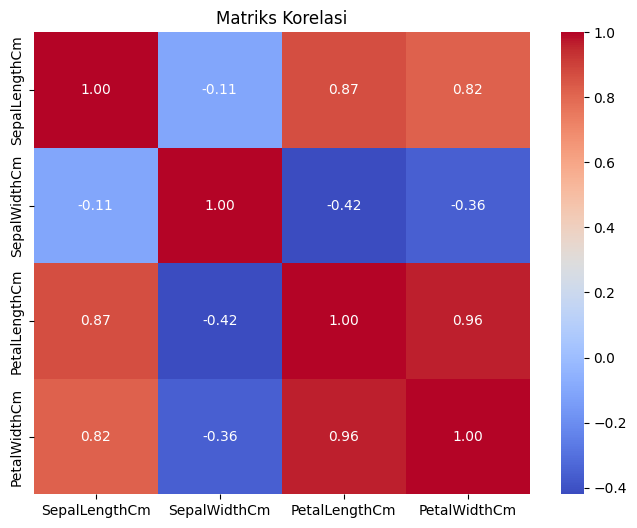

In [ ]:
# ==== 6. Korelasi Antar Variabel Numerik ====
plt.figure(figsize=(8,6))

numeric_df = df.drop(columns=["Id", "Species"])

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()


In [ ]:
# ==== 7. Deteksi Outlier dengan IQR ====
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers

for col in ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]:
    outliers = detect_outliers_iqr(df, col)
    print(f"\nOutlier pada {col}: {len(outliers)} data")
    if not outliers.empty:
        print(outliers[[col, "Species"]].head())


Outlier pada SepalLengthCm: 0 data

Outlier pada SepalWidthCm: 4 data
    SepalWidthCm          Species
15           4.4      Iris-setosa
32           4.1      Iris-setosa
33           4.2      Iris-setosa
60           2.0  Iris-versicolor

Outlier pada PetalLengthCm: 0 data

Outlier pada PetalWidthCm: 0 data


In [7]:
import pandas as pd
import numpy as np
from scipy import stats

# 1. Baca dataset iris (pastikan file iris.csv ada di folder yang sama dengan notebook)
dataset = pd.read_csv("/content/Iris.csv")

# 2. Ambil hanya kolom numerik
numeric_data = dataset.select_dtypes(include='number')

# 3. Hitung Z-Score
z_scores = np.abs(stats.zscore(numeric_data))

# 4. Deteksi outlier (threshold = 3)
outliers_zscore = dataset[(z_scores > 3).any(axis=1)]

# 5. Print jumlah dan tampilkan data outlier
print(f"Jumlah outlier dengan Z-Score: {len(outliers_zscore)}")
outliers_zscore.head()


Jumlah outlier dengan Z-Score: 0


Empty DataFrame
Columns: [Id;SepalLengthCm;SepalWidthCm;PetalLengthCm;PetalWidthCm;Species]
Index: []

1. KNN

    *   Prinsip kerja:

        KNN untuk deteksi outlier menghitung jarak rata-rata ke k tetangga terdekat. Jika jarak suatu titik ke tetangganya jauh lebih besar dibanding data lain, maka titik itu dianggap outlier.

    *   Kelebihan:

        Konsep sederhana dan mudah dipahami, Cocok untuk data berdimensi rendah hingga menengah.

    *   Kelemahan:

        Kurang efektif di data berdimensi tinggi (curse of dimensionality), Memerlukan perhitungan jarak yang cukup mahal pada dataset besar.

    *   Output:

        a. Anomaly = 1 menunjukkan data jauh dari tetangga terdekatnya → kandidat outlier.

        b. Anomaly_Score semakin besar berarti semakin jauh jarak dari tetangga.


In [9]:
import pandas as pd

# Ganti nama file sesuai dengan yang Anda upload
df_knn = pd.read_csv("KNN.csv")

# Tampilkan 5 baris pertama
print(df_knn.to_string())


               class  petal_length  petal_width  sepal_length  sepal_width  Anomaly  Anomaly_Score
0        Iris-setosa           1.0          0.2           4.6          3.6        0       0.565685
1        Iris-setosa           1.1          0.1           4.3          3.0        0       0.500000
2        Iris-setosa           1.2          0.2           5.0          3.2        0       0.346410
3        Iris-setosa           1.2          0.2           5.8          4.0        0       0.583095
4        Iris-setosa           1.3          0.2           4.4          3.0        0       0.300000
5        Iris-setosa           1.3          0.2           4.4          3.2        0       0.316228
6        Iris-setosa           1.3          0.2           4.7          3.2        0       0.264575
7        Iris-setosa           1.3          0.2           5.5          3.5        0       0.360555
8        Iris-setosa           1.3          0.3           4.5          2.3        1       0.793726
9        I

2. ABOD

    *   Prinsip kerja:

        ABOD mengukur sudut antara vektor-vektor yang dibentuk oleh suatu titik dengan titik-titik lain. Jika variasi sudut kecil (data cenderung ke satu arah), maka data itu cenderung menjadi outlier.

    *   Kelebihan:

        Lebih stabil dibanding LOF/KNN pada data berdimensi tinggi, Tidak hanya mengandalkan jarak, tetapi juga arah distribusi data.

    *   Kelemahan:

        Komputasinya lebih berat dibanding LOF dan KNN, Lebih lambat pada dataset besar.

    *   Output:

        a. Anomaly = 1 berarti distribusi sudut titik tersebut tidak mengikuti pola mayoritas data.

        b. Anomaly_Score menunjukkan tingkat keanehan (semakin besar → semakin outlier).


In [10]:
import pandas as pd

# Ganti nama file sesuai dengan yang Anda upload
df_abod = pd.read_csv("ABOD.csv")

# Tampilkan 5 baris pertama
print(df_abod.to_string())


               class  petal_length  petal_width  sepal_length  sepal_width  Anomaly  Anomaly_Score
0        Iris-setosa           1.0          0.2           4.6          3.6        0      -0.771745
1        Iris-setosa           1.1          0.1           4.3          3.0        0      -6.211703
2        Iris-setosa           1.2          0.2           5.0          3.2        0     -22.260507
3        Iris-setosa           1.2          0.2           5.8          4.0        0      -0.971267
4        Iris-setosa           1.3          0.2           4.4          3.0        0    -128.152246
5        Iris-setosa           1.3          0.2           4.4          3.2        0     -44.802539
6        Iris-setosa           1.3          0.2           4.7          3.2        0     -93.422000
7        Iris-setosa           1.3          0.2           5.5          3.5        0      -3.638189
8        Iris-setosa           1.3          0.3           4.5          2.3        1      -0.088998
9        I

3. LOF

    *   Prinsip kerja:
    
        LOF membandingkan kepadatan lokal suatu titik dengan tetangganya.Jika suatu data memiliki kepadatan jauh lebih rendah dibanding lingkungan sekitarnya, maka data tersebut dianggap outlier.

    *   Kelebihan:

        Bagus untuk data dengan distribusi tidak seragam, Mampu mendeteksi outlier yang “tersembunyi” di daerah padat.

    *   Kelemahan:

        Sensitif terhadap parameter jumlah tetangga (k), Bisa salah deteksi jika data terlalu sedikit.

    *   Output:

        a. Anomaly = 1 → data dianggap outlier.

        b. Anomaly_Score → semakin tinggi nilainya, semakin kuat indikasi data tersebut outlier.



In [8]:
import pandas as pd

# Ganti nama file sesuai dengan yang Anda upload
df_lof = pd.read_csv("LOF.csv")

# Tampilkan 5 baris pertama
print(df_lof.to_string())

               class  petal_length  petal_width  sepal_length  sepal_width  Anomaly  Anomaly_Score
0        Iris-setosa           1.0          0.2           4.6          3.6        0       1.294602
1        Iris-setosa           1.1          0.1           4.3          3.0        0       1.326518
2        Iris-setosa           1.2          0.2           5.0          3.2        0       0.972286
3        Iris-setosa           1.2          0.2           5.8          4.0        0       1.463125
4        Iris-setosa           1.3          0.2           4.4          3.0        0       1.134884
5        Iris-setosa           1.3          0.2           4.4          3.2        0       1.123400
6        Iris-setosa           1.3          0.2           4.7          3.2        0       1.019841
7        Iris-setosa           1.3          0.2           5.5          3.5        0       1.073003
8        Iris-setosa           1.3          0.3           4.5          2.3        1       1.777233
9        I